# Stats 170 A Assignment 3
Names: Lizbeth Ramirez, Tiffany Kong, Trian Gunney, Kara Statham

## Question 1

### Part A

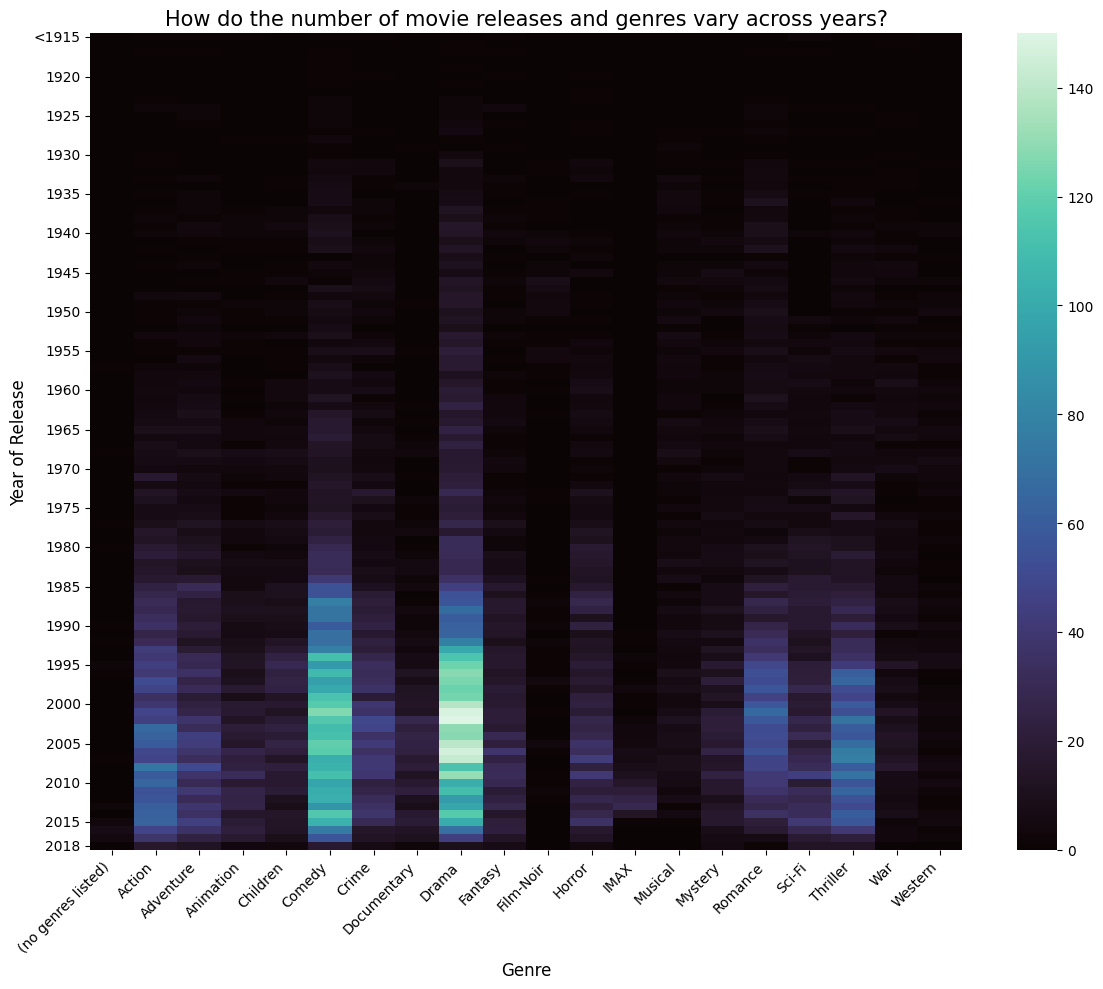

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

movies = pd.read_csv("Task1a\\movies.csv")

# extract year
movies["year"] = movies["title"].transform(lambda x: x.strip()[-5:-1])

# filter out movies with no years
movies = movies[movies["year"].str.isdigit()]

# int
movies["year"] = movies["year"].astype(int)

# since some movies are outliers before 1915, bin them
movies["year_bin"] = movies["year"].where(movies["year"] >= 1915, "<1915")
year_order = ["<1915"] + sorted(movies.loc[movies["year"] >= 1915, "year"].unique())
movies["year_bin"] = pd.Categorical(movies["year_bin"], categories=year_order, ordered=True)

# singular genre tags
movies["genres"] = movies["genres"].str.split("|")
clean_movies = movies.explode("genres").reset_index()

# create heatmap data
heatmap_data = pd.crosstab(clean_movies["year_bin"], clean_movies["genres"])

plt.figure(figsize=(12, 10))

# heatmap
ax = sb.heatmap(heatmap_data, cmap = "mako")

# specify y-ticks: every 5th row, including last row
n = len(heatmap_data)
ytick_idx = list(range(0, n, 5))
if (n - 1) not in ytick_idx:
    ytick_idx.append(n - 1)
ytick_idx = sorted(ytick_idx)
ax.set_yticks([i + 0.5 for i in ytick_idx])
ax.set_yticklabels(heatmap_data.index[ytick_idx])

plt.title("How do the number of movie releases and genres vary across years?", fontsize=15)
plt.ylabel("Year of Release", fontsize=12)
plt.xlabel("Genre", fontsize=12)
plt.xticks(rotation = 45, ha = "right")
plt.tight_layout()
plt.show()

### Part B

C:\Users\lizbe\AppData\Local\Temp\ipykernel_96140\1156325616.py:30: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(


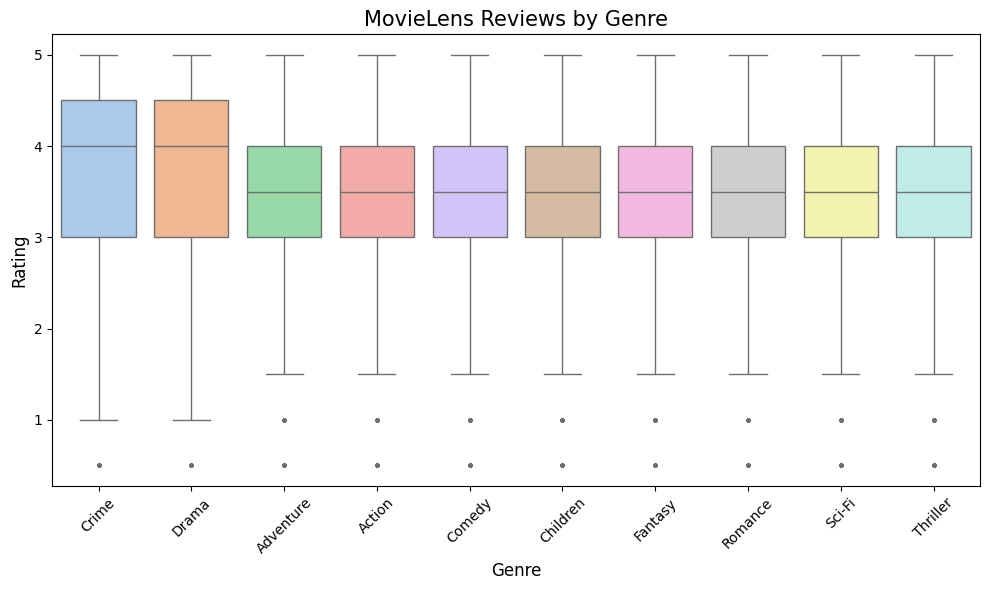

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# import movie and ratings data
movies = pd.read_csv("Task1a/movies.csv")
ratings = pd.read_csv("Task1b/ratings.csv")

# split genres properly
movies_genres = movies.assign(
    genre=movies['genres'].str.split('|')
).explode('genre')

# remove junk genre
movies_genres = movies_genres[movies_genres['genre'] != '(no genres listed)']

# join ratings with movies to get genre information
movie_ratings = ratings.merge(movies_genres[['movieId', 'genre']], on='movieId', how='inner')

# fix: only have top genres displayed
top_genres = movie_ratings['genre'].value_counts().nlargest(10).index
movie_ratings = movie_ratings[movie_ratings['genre'].isin(top_genres)]

# order by median ratings
genre_order = movie_ratings.groupby('genre')['rating'].median().sort_values(ascending=False).index

# Plot: How do MovieLens reviews vary by genre?
plt.figure(figsize=(10,6))

sns.boxplot(
    data=movie_ratings,
    x='genre',
    y='rating',
    order=genre_order,
    palette=sns.color_palette("pastel"),
    fliersize=2
)

plt.title("MovieLens Reviews by Genre", fontsize=15)
plt.xlabel("Genre", fontsize=12)
plt.ylabel("Rating", fontsize=12)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

## Question 2

findfont: Font family 'Arial Narrow' not found.
findfont: Font family 'Arial Narrow' not found.
findfont: Font family 'Arial Narrow' not found.
findfont: Font family 'Arial Narrow' not found.
findfont: Font family 'Arial Narrow' not found.
findfont: Font family 'Arial Narrow' not found.
findfont: Font family 'Arial Narrow' not found.
findfont: Font family 'Arial Narrow' not found.
findfont: Font family 'Arial Narrow' not found.
findfont: Font family 'Arial Narrow' not found.
findfont: Font family 'Arial Narrow' not found.
findfont: Font family 'Arial Narrow' not found.
findfont: Font family 'Arial Narrow' not found.
findfont: Font family 'Arial Narrow' not found.
findfont: Font family 'Arial Narrow' not found.
findfont: Font family 'Arial Narrow' not found.
findfont: Font family 'Arial Narrow' not found.
findfont: Font family 'Arial Narrow' not found.
findfont: Font family 'Arial Narrow' not found.


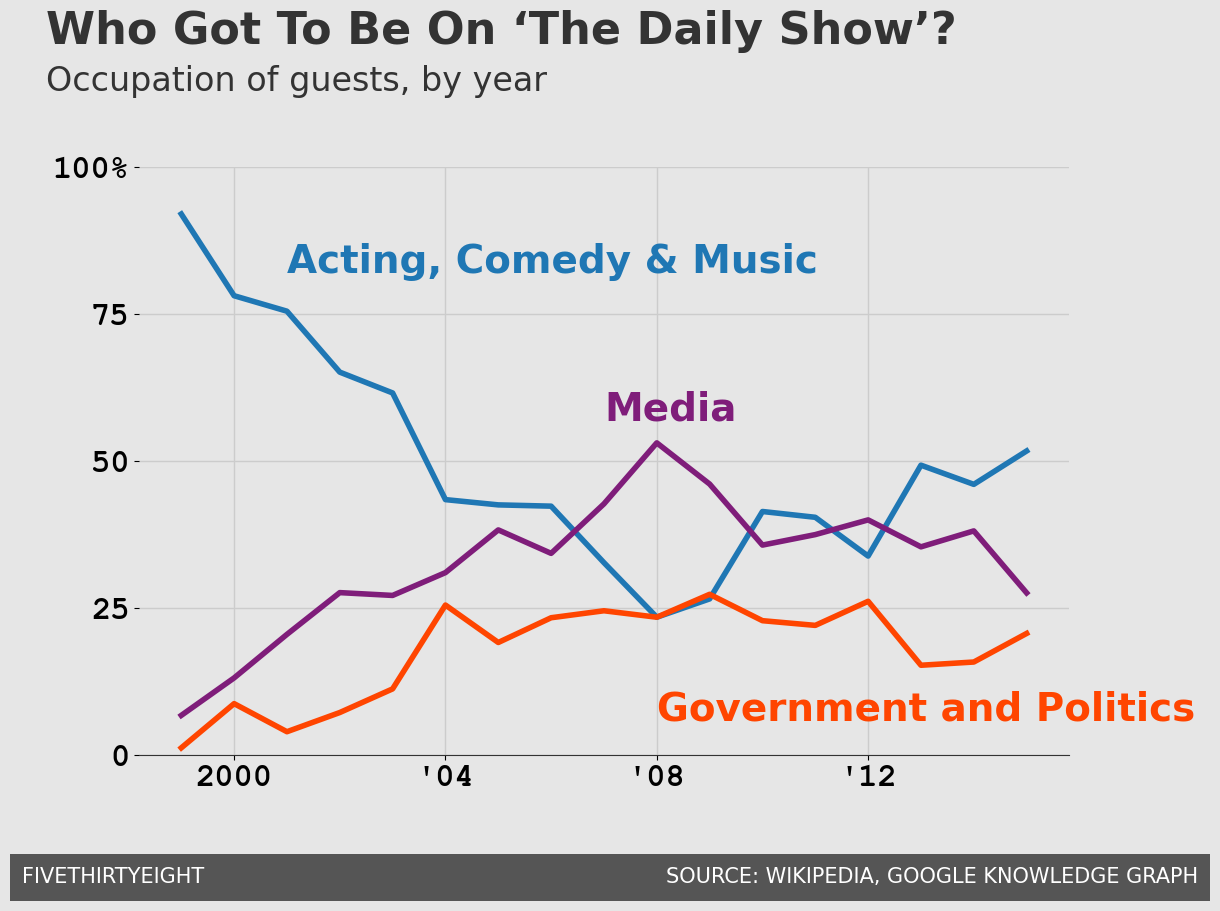

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.patches as patches

df = pd.read_csv("Task2/daily_show_guests.csv")
df["YEAR"] = df["YEAR"].astype(int)

def collapse_group(x):
    if x in ["Acting", "Comedy", "Musician"]:
        return "Acting, Comedy & Music"
    elif x in ["Media", "media"]:
        return "Media"
    elif x in ["Government", "Politician", "Political Aide", "Military"]:
        return "Government and Politics"
    else:
        return None

df["Collapsed_Group"] = df["Group"].apply(collapse_group)
df = df.dropna(subset=["Collapsed_Group"])

counts = (
    df.groupby(["YEAR", "Collapsed_Group"])
      .size()
      .reset_index(name="count")
)

totals = (
    counts.groupby("YEAR")["count"]
          .sum()
          .reset_index(name="total")
)

counts = counts.merge(totals, on="YEAR")
counts["percent"] = counts["count"] / counts["total"] * 100

plot_df = counts.pivot(
    index="YEAR",
    columns="Collapsed_Group",
    values="percent"
)

plt.figure(figsize=(12, 9.32), facecolor="#e6e6e6")

colors = {
    "Acting, Comedy & Music": "#1f77b4",
    "Media": "#7f1d7a",
    "Government and Politics": "#ff4500"
}

for group, color in colors.items():
    plt.plot(
        plot_df.index,
        plot_df[group],
        linewidth=4,
        color=color
    )

x_coord = 0.03
main_title_y = 0.92
subtitle_y = 0.87

plt.text(
    x_coord, main_title_y,
    "Who Got To Be On ‘The Daily Show’?",
    transform=plt.gcf().transFigure,
    fontsize=32,
    weight="bold",
    ha="left",
    color="#333333"
)

plt.text(
    x_coord, subtitle_y,
    "Occupation of guests, by year",
    transform=plt.gcf().transFigure,
    fontsize=24,
    ha="left",
    color="#333333"
)

plt.ylim(0, 100)

plt.yticks([0, 25, 50, 75, 100], ["0", "25", "50", "75", "100%"], fontsize=23, fontname="Courier New", weight="bold")

xticks = [2000, 2004, 2008, 2012]
xtick_labels = ["2000", "'04", "'08", "'12"]

plt.xticks(xticks, xtick_labels, fontsize=23, fontname="Courier New", weight="bold")

plt.grid(axis="y", color="#cccccc", linewidth=1)
plt.grid(axis="x", color="#cccccc", linewidth=1)

ax = plt.gca()
ax.set_facecolor("#e6e6e6")

fig = plt.gcf()
rect = patches.Rectangle(
    (0, 0), 1, 0.05,
    transform=fig.transFigure,
    facecolor="#555555",
    zorder=0
)
fig.patches.append(rect)

ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)
ax.spines["left"].set_visible(False)
ax.spines["bottom"].set_color("#333333")

plt.xlabel("")

plt.text(2001, 82, "Acting, Comedy & Music", color=colors["Acting, Comedy & Music"], fontsize=28, weight="bold", fontname="Arial Narrow")
plt.text(2007, 57, "Media", color=colors["Media"], fontsize=28, weight="bold", fontname="Arial Narrow")
plt.text(2008, 6, "Government and Politics", color=colors["Government and Politics"], fontsize=28, weight="bold", fontname="Arial Narrow")

plt.figtext(0.01, 0.02, "FIVETHIRTYEIGHT", fontsize=15, color="white", fontname="Arial Narrow")
plt.figtext(0.99, 0.02, "SOURCE: WIKIPEDIA, GOOGLE KNOWLEDGE GRAPH", fontsize=15, color="white", ha="right", fontname="Arial Narrow")

plt.tight_layout(rect=[0, 0.1, 1, 0.88])
plt.show()

## Question 3

In [4]:
import pandas as pd
import numpy as np
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
from sklearn.cluster import AgglomerativeClustering
from sklearn.cluster import KMeans

##### Part A

In [5]:
# Prepare dataframe
df = pd.read_csv("task3/my_basket.csv")
X = df.values

X_scaled = StandardScaler().fit_transform(X)

Rescaling is necessary because PCA is variance-based and scaling allows for a fairer distribution of ingredients with different frequencies.

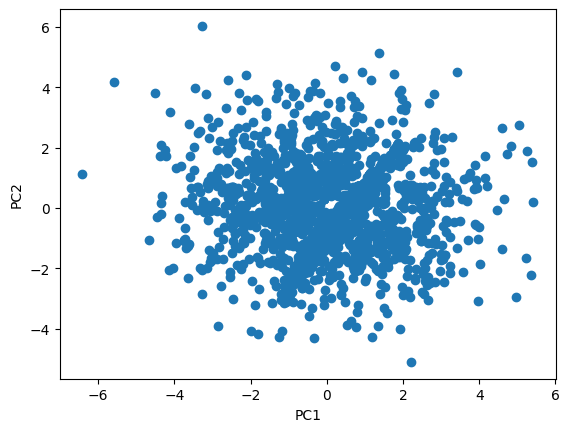

In [6]:
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

plt.figure()
plt.scatter(X_pca[:, 0], X_pca[:, 1])
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.show()

##### Part B

In [7]:
print(pca.explained_variance_ratio_)

[0.05457025 0.05171412]


The first principal component explains around 5.5% of the variance, and the second explains about 5.2%, so together they explain around 10.6% of the variance.

##### Part C

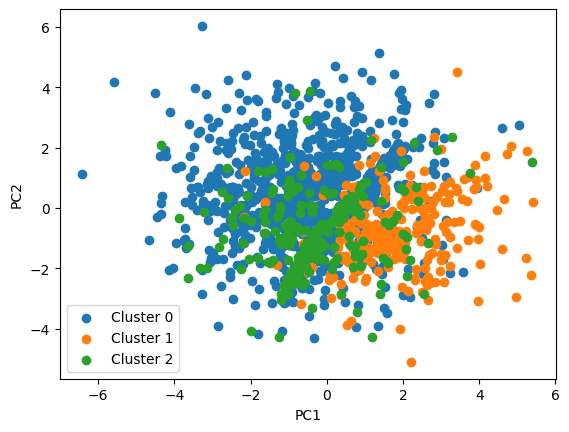

In [8]:
clustering = AgglomerativeClustering(n_clusters=3).fit(X_scaled)
labels = clustering.labels_

plt.figure()
for cluster in range(3):
    plt.scatter(
        X_pca[labels == cluster, 0],
        X_pca[labels == cluster, 1],
        label = f'Cluster {cluster}'
    )
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.legend()
plt.show()

The clustering looks somewhat reasonable in the PCA plot, but there is still a lot of overlap and ambiguity. However, we can see that the the blue cluster is generally in the left region, the orange is generally in the right, and the green is generally in the middle.

##### Part D

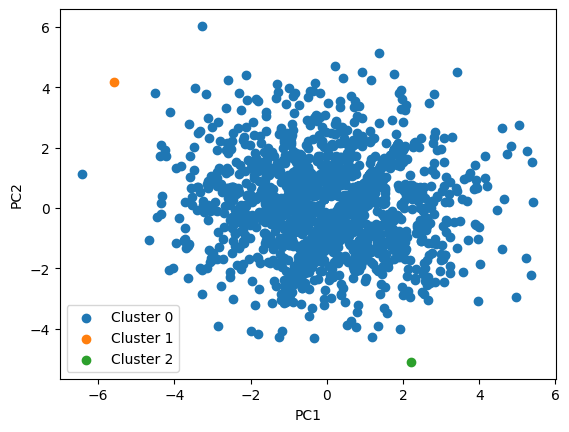

In [9]:
# First change: changing linkage to average

clustering2 = AgglomerativeClustering(n_clusters=3, linkage='average').fit(X_scaled)
labels = clustering2.labels_

plt.figure()
for cluster in range(3):
    plt.scatter(
        X_pca[labels == cluster, 0],
        X_pca[labels == cluster, 1],
        label = f'Cluster {cluster}'
    )
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.legend()
plt.show()

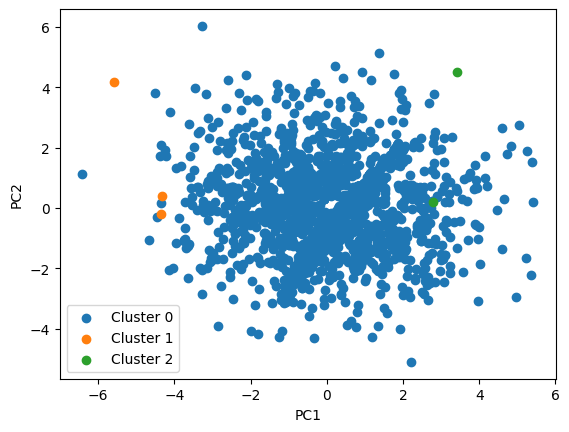

In [10]:
# Second change: changing linkage to complete

clustering3 = AgglomerativeClustering(n_clusters=3, linkage='complete').fit(X_scaled)
labels = clustering3.labels_

plt.figure()
for cluster in range(3):
    plt.scatter(
        X_pca[labels == cluster, 0],
        X_pca[labels == cluster, 1],
        label = f'Cluster {cluster}'
    )
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.legend()
plt.show()

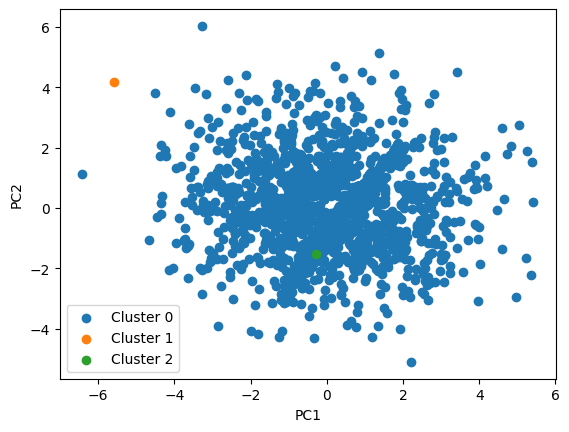

In [11]:
# Third change: changing linkage to single

clustering4 = AgglomerativeClustering(n_clusters=3, linkage='single').fit(X_scaled)
labels = clustering4.labels_

plt.figure()
for cluster in range(3):
    plt.scatter(
        X_pca[labels == cluster, 0],
        X_pca[labels == cluster, 1],
        label = f'Cluster {cluster}'
    )
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.legend()
plt.show()

Changing linkage from the default 'ward' to single, complete, or average changes the clusters significantly: all points except for 2-4 outliners are all part of the same cluster 0 which dominates in size. Ward linkage seems to produce the most balanced clusters.

##### Part E

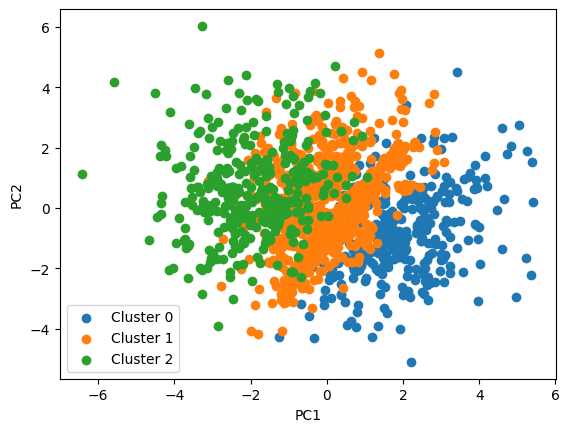

In [12]:
kmeans = KMeans(n_clusters=3).fit(X_scaled)
labels = kmeans.labels_

plt.figure()
for cluster in range(3):
    plt.scatter(
        X_pca[labels == cluster, 0],
        X_pca[labels == cluster, 1],
        label = f'Cluster {cluster}'
    )
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.legend()
plt.show()

My Kmeans clustering changes randomly a lot every time I run it, so it is difficult to get a final reproducible representation. However, most iterations look very different from the agglomerative clustering method, and the clusters are not consistent.